# Variables
#### btc: bitcoin dataframe
#### close: bitcoing closing prices stored in a dataframe
#### movAvg: moving Average
#### wma: weighted moving average
#### test_stationarity: function to test stationarity

In [73]:
#import warnings
#import iteritools
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
%matplotlib inline



In [75]:
btc= pd.read_csv("BitcoinUSD.csv")
#print(btc.head())

#co2data = sm.datasets.co2.load_pandas()
#co2 = co2data.data

#print(co2.head(5))




# Visualisation

In [ ]:
import plotly.plotly as py
import plotly.graph_objs as go

# Create a trace
trace = go.Scatter(
    x = btc.date,
    y = btc['close']
)

data = [trace]

py.iplot(data, filename='Bitcoin Closing Prices')

In [77]:
btc.set_index("date")

,open,high,low,close,quoteVolume,volume,weightedAverage
date,,,,,,,
2015-02-20,240.250118,245.000000,240.250000,240.250000,0.230429,5.589490e+01,242.568479
2015-02-22,245.000000,249.000000,235.000000,235.000000,0.539055,1.291212e+02,239.532608
2015-02-23,235.000002,235.001000,235.000000,235.000000,0.410926,9.656756e+01,235.000062
2015-02-24,235.000000,239.750000,235.000000,239.750000,0.626749,1.491544e+02,237.981177
2015-02-26,237.750000,239.800000,237.750000,238.500000,0.000650,1.554879e-01,239.116563
2015-02-27,238.500000,249.000000,238.500000,249.000000,1.589037,3.837554e+02,241.501825
2015-02-28,240.000000,251.000000,240.000000,240.000060,0.071330,1.714734e+01,240.394041
2015-03-01,240.000121,251.000000,240.000121,251.000000,0.001270,3.177152e-01,250.202965
2015-03-02,252.000000,269.000000,251.000000,269.000000,0.379032,9.806380e+01,258.721874


In [78]:
print("\n Data Types: ")
btc.dtypes



 Data Types: 


date                object
open               float64
high               float64
low                float64
close              float64
quoteVolume        float64
volume             float64
weightedAverage    float64
dtype: object

## The date is not read as a time series object

In [ ]:
#df['DateTime'] = pd.to_datetime(df['DateTime']) #Convert column to datetime 

In [79]:
#dateparse = lambda dates: pd.datetime(dates, '%Y-%m')
#btc = pd.read_csv('BitcoinUSD.csv', parse_dates=["date"], index_col="date",date_parser=dateparse)
# ^^ Doesn't work!

btc['date'] = pd.to_datetime(btc['date'])
print("\n Data Types: ")
btc.dtypes


 Data Types: 


date               datetime64[ns]
open                      float64
high                      float64
low                       float64
close                     float64
quoteVolume               float64
volume                    float64
weightedAverage           float64
dtype: object

In [80]:
btc.set_index("date", inplace = True)
#Sets the column as the index, without inplace it doesn't seem to take effect.

In [ ]:
btc.index

In [ ]:
close = btc['close'] 
close.tail(10)

## Getting values using Date Index

In [ ]:
close['2018-03-15']
#close['2018-03-01':'2018-03-15']


## Prices in March 

In [ ]:
close['2018-03']



# Checking Stationarity


In [81]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = timeseries.rolling(window=12,center=False).mean()
    rolstd = timeseries.rolling(window=12,center=False).std()

    #Plot rolling statistics:
    plt.figure(figsize=(20, 10))
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
   
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print( 'Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

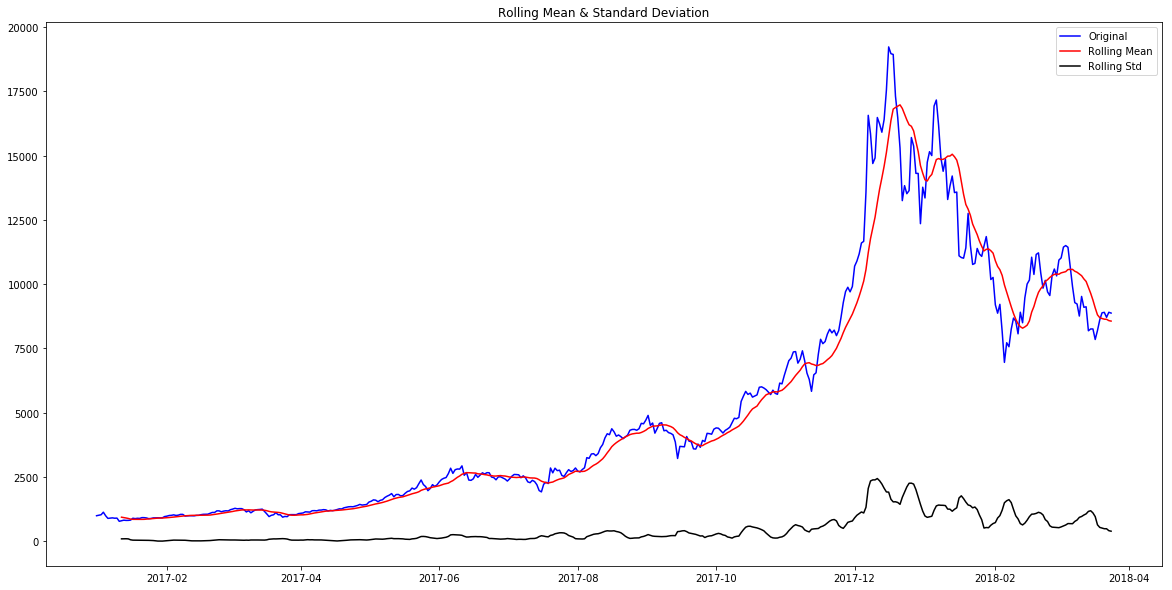

Results of Dickey-Fuller Test:
Test Statistic                  -1.065508
p-value                          0.728629
#Lags Used                      17.000000
Number of Observations Used    427.000000
Critical Value (1%)             -3.445758
Critical Value (5%)             -2.868333
Critical Value (10%)            -2.570388
dtype: float64


In [82]:
test_stationarity(close)

Dickey-Fuller Test for checking stationarity. If the ‘Test Statistic’ is less than the ‘Critical Value’, we can reject the null hypothesis and say that the series is stationary. 'Test Statistic' is MORE than 'Critical Value'
#### So the series isn't stationary (also since the mean is constantly varying I guess)

# Moving Average

In [ ]:
#movAvg = pd.rolling_mean(close, 12)

movAvg = close.rolling(window=12, center=False).mean()
plt.figure(figsize=(20, 10))
plt.plot(close)
plt.plot(movAvg, color='red')



## 2017-2018 (Below)

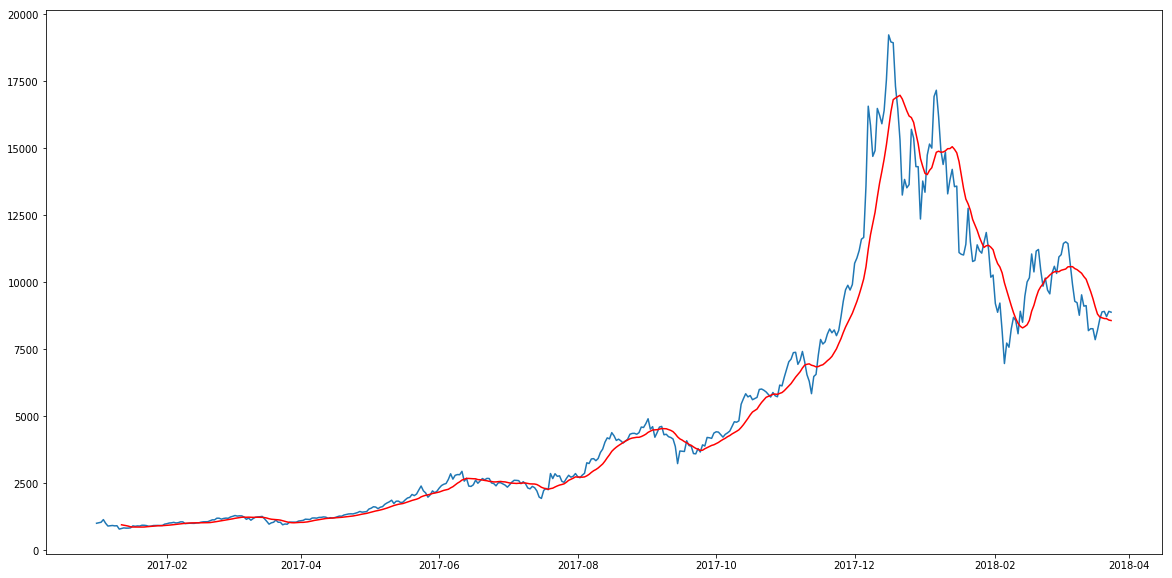

In [83]:
#movAvg = pd.rolling_mean(close, 12)
close = close['2017':'2018']


movAvg = close.rolling(window=12, center=False).mean()
plt.figure(figsize=(20, 10))
plt.plot(close)
plt.plot(movAvg, color='red')



In [ ]:
close_movAvg_Diff = close - movAvg
close_movAvg_Diff.head(12)

In [ ]:
close_movAvg_Diff.dropna(inplace=True)
test_stationarity(close_movAvg_Diff)

### 95% confidence that the series is stationary now

# Weighted Moving Average

In [ ]:
wma = close.ewm(halflife=12, min_periods=0, adjust=True,ignore_na=False).mean()
plt.figure(figsize=(20, 10))
plt.plot(close)
plt.plot(wma, color='red')

In [ ]:
close_wma_Diff = close - wma
test_stationarity(close_wma_Diff)

#### For 12 window decay, the statistic is bad and is less more than 10% of the critical value..  but for 4 and 8 decay, it is less than 5% critical values. 

# Differencing

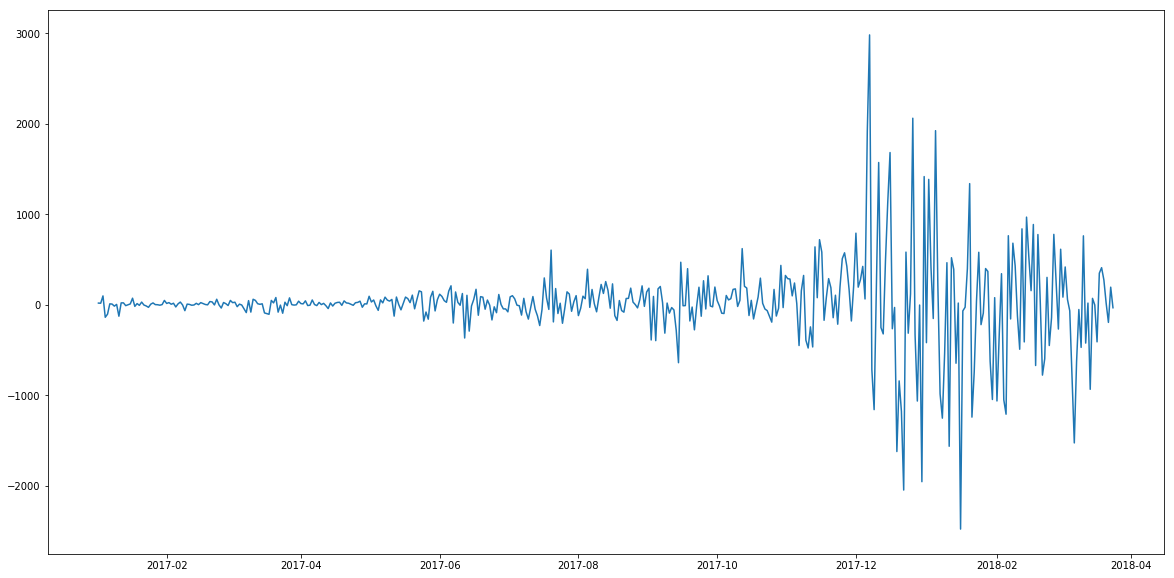

In [88]:
close_diff = close - close.shift(1)
plt.figure(figsize=(20, 10))
plt.plot(close_diff)

#close_diff.to_csv('DifferencedClosePrices.csv')

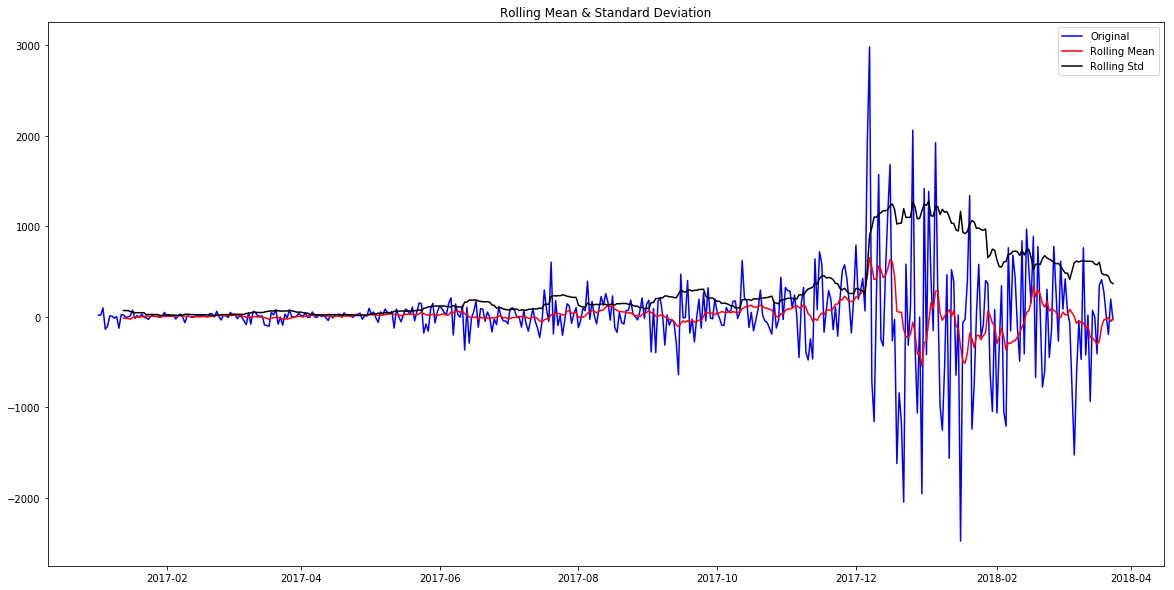

Results of Dickey-Fuller Test:
Test Statistic                  -4.349674
p-value                          0.000364
#Lags Used                      18.000000
Number of Observations Used    425.000000
Critical Value (1%)             -3.445831
Critical Value (5%)             -2.868365
Critical Value (10%)            -2.570405
dtype: float64


In [89]:
close_diff.dropna(inplace=True)
test_stationarity(close_diff)

#### Differencing did the trick!

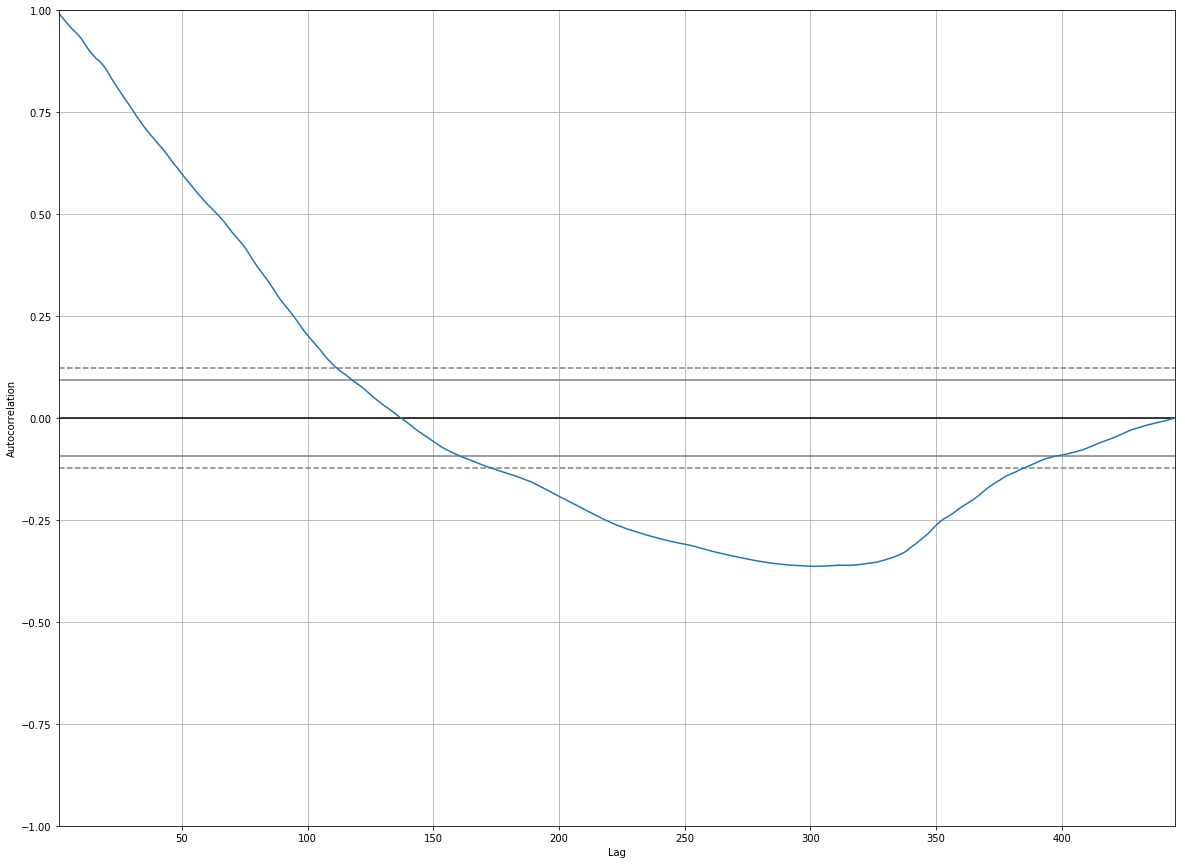

In [101]:
from pandas.plotting import autocorrelation_plot

plt.figure(figsize=(20,15))
autocorrelation_plot(close)
plt.show()

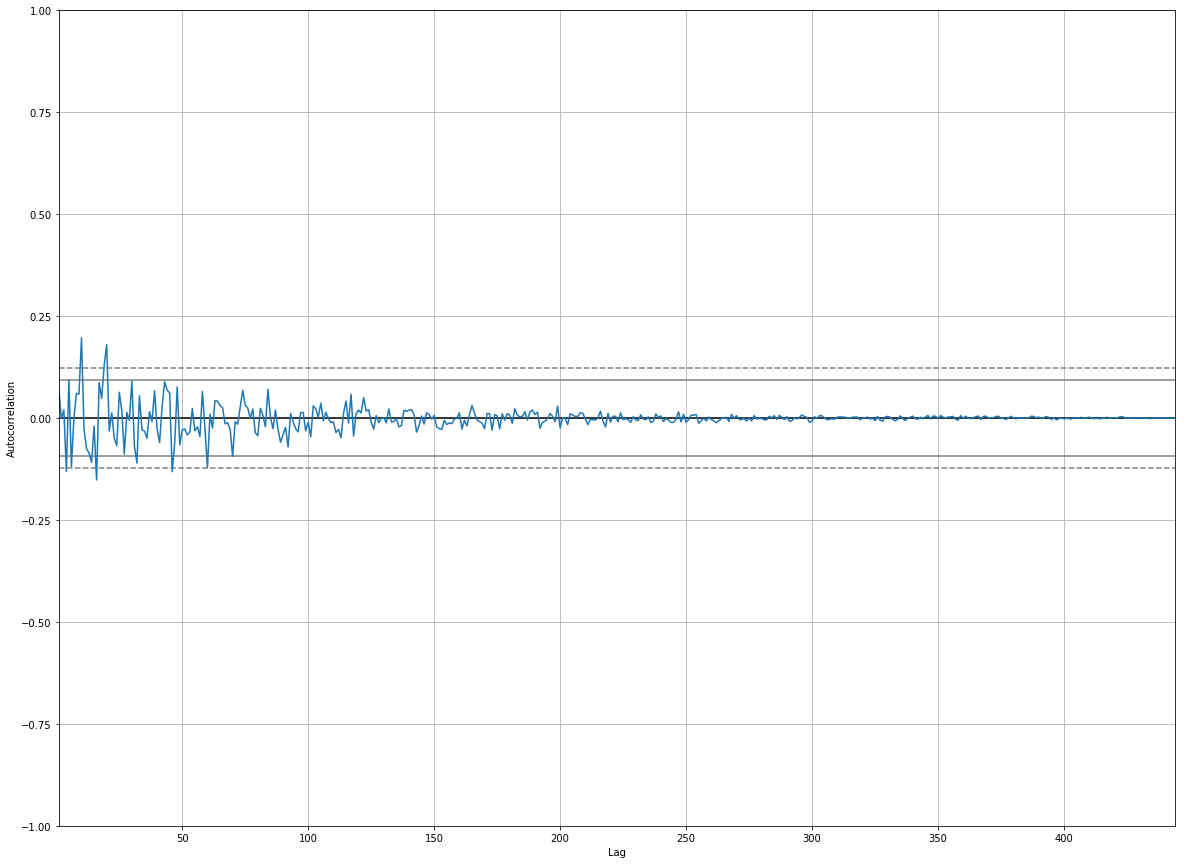

In [100]:
#from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

from pandas.plotting import autocorrelation_plot

plt.figure(figsize=(20,15))
autocorrelation_plot(close_diff)
plt.show()
#plot_acf(close_diff,alpha=0.5,use_vlines=True, unbiased=True)

In [ ]:
plt.rcParams.update({'font.size': 12})
plt.figure(figsize=(10, 15))
plt.plot(close_diff, label="Differenced closing prices")


# Decomposing (You can't use multiplicative model differenced data because it doesn't take negative values and 0)

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(close, freq=30, model='multiplicative')

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.rcParams.update({'font.size': 16})
plt.figure(figsize=(20, 25))

plt.subplot(411)
plt.plot(close, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

residual.to_csv('BTCMultiplicativeResidual.csv')
#decomposition.to_csv('DecomposedBTC.csv')

In [ ]:
close_TS = close_diff - (trend + seasonal)
close_TSR = close_diff - (trend + seasonal + residual)

plt.rcParams.update({'font.size': 16})
plt.figure(figsize=(20, 25))

plt.subplot(411)
plt.plot(close, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(close_TS, label='TS')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(close_TSR,label='TSR')
plt.legend(loc='best')
plt.tight_layout()

# Checking the components for stationarity

In [ ]:
#replace the residual with "trend" or "seasonal" for checking stationarity on those

close_decompose = residual
close_decompose.dropna(inplace=True)
test_stationarity(close_decompose)

In [ ]:
#replace the residual with "trend" or "seasonal" for checking stationarity on those

close_decompose = seasonal
close_decompose.dropna(inplace=True)
test_stationarity(close_decompose)

### Almost 99% confidence that the series is stationary